In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r"C:\Users\DELL\water-main-breaks.xlsx" 

# Load the dataset into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows to confirm it's loaded correctly
print(df.head())

   OBJECTID  Wat Break Incident ID  incident-date Type of Asset Broken  \
0      8419                   1677          31048                 MAIN   
1      9577                   1667          31048                 MAIN   
2     10350                   1668          31048                 MAIN   
3      8788                   1669          31413                 MAIN   
4      9260                   1688          31778                 MAIN   

  Current status of the break UPDATE_DATE  \
0            REPAIR COMPLETED  2011-12-15   
1            REPAIR COMPLETED  2011-12-15   
2            REPAIR COMPLETED  2019-07-18   
3            REPAIR COMPLETED  2011-12-15   
4            REPAIR COMPLETED  2011-12-15   

  Date operations was returned to normal service Nature of Break  \
0                                            NaT         UNKNOWN   
1                                            NaT         UNKNOWN   
2                                            NaT         UNKNOWN   
3           

In [2]:
#Basic Info
print("Shape:", df.shape)

print("\nInfo:\n")
print(df.info())

Shape: (2839, 18)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   OBJECTID                                        2839 non-null   int64         
 1   Wat Break Incident ID                           2839 non-null   int64         
 2   incident-date                                   2839 non-null   int64         
 3   Type of Asset Broken                            2839 non-null   object        
 4   Current status of the break                     2839 non-null   object        
 5   UPDATE_DATE                                     2447 non-null   datetime64[ns]
 6   Date operations was returned to normal service  106 non-null    datetime64[ns]
 7   Nature of Break                                 2636 non-null   object        
 8   Apparent cause of brea

In [3]:
# Value Counts (Categorical Columns)
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print("\nPercentage:")
    print(df[col].value_counts(normalize=True) * 100)
    print("-" * 50)


Column: Type of Asset Broken
Type of Asset Broken
MAIN       2786
SERVICE      53
Name: count, dtype: int64

Percentage:
Type of Asset Broken
MAIN       98.133145
SERVICE     1.866855
Name: proportion, dtype: float64
--------------------------------------------------

Column: Current status of the break
Current status of the break
REPAIR COMPLETED       2818
CANCELLED                19
UNDER INVESTIGATION       2
Name: count, dtype: int64

Percentage:
Current status of the break
REPAIR COMPLETED       99.260303
CANCELLED               0.669250
UNDER INVESTIGATION     0.070447
Name: proportion, dtype: float64
--------------------------------------------------

Column: Nature of Break
Nature of Break
UNKNOWN                                      2003
CIRCUMFERENTIAL                               376
CORROSION                                      90
FITTING/JOINT                                  54
LONGITUDINAL                                   27
CIRCUMFERENTIAL AND FITTING/JOINT        

In [4]:
# Step 1: Data Cleaning
# Extract numbers
df['incident-date'] = df['incident-date'].astype(str).str.extract('(\d+)') 
# Convert to numbers
df['incident-date'] = pd.to_numeric(df['incident-date'], errors='coerce')  
df['incident-date'] = pd.to_datetime(df['incident-date'], origin='1899-12-30', unit='D', errors='coerce')
df['incident-date'] = df['incident-date'].dt.strftime("%d/%m/%Y")  # Format as dd/mm/yyyy

print(df[['incident-date']].head())

  incident-date
0    01/01/1985
1    01/01/1985
2    01/01/1985
3    01/01/1986
4    01/01/1987


In [5]:

# Convert date columns to datetime format

df["UPDATE_DATE"] = pd.to_datetime(df["UPDATE_DATE"], format="%d/%m/%Y", errors="coerce")

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_count = df.duplicated().sum()

print("Missing Values:\n", missing_values)
print("\nNumber of Duplicate Rows:", duplicate_count)

Missing Values:
 OBJECTID                                             0
Wat Break Incident ID                                0
incident-date                                        0
Type of Asset Broken                                 0
Current status of the break                          0
UPDATE_DATE                                        392
Date operations was returned to normal service    2733
Nature of Break                                    203
Apparent cause of break                            281
Repair Type                                       2648
Street                                              15
Related Asset ID                                     0
Related Asset Depth (m)                           2824
Depth of Frost (m)                                2758
Asset Size (cm)                                    278
Year Asset Installed                               282
Asset Material                                     278
Asset Exists                                    

In [6]:
#missing values percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

OBJECTID                                           0.000000
Wat Break Incident ID                              0.000000
incident-date                                      0.000000
Type of Asset Broken                               0.000000
Current status of the break                        0.000000
UPDATE_DATE                                       13.807679
Date operations was returned to normal service    96.266291
Nature of Break                                    7.150405
Apparent cause of break                            9.897851
Repair Type                                       93.272279
Street                                             0.528355
Related Asset ID                                   0.000000
Related Asset Depth (m)                           99.471645
Depth of Frost (m)                                97.146883
Asset Size (cm)                                    9.792180
Year Asset Installed                               9.933075
Asset Material                          

In [7]:
file_path = r"C:\Users\DELL\water-main-breaks.xlsx"

print("Missing Values Before Imputation:")
print(df.isnull().sum())

#  Forward fill for datetime columns
df['UPDATE_DATE'] = df['UPDATE_DATE'].ffill()

#  Categorical columns - fill with mode (most frequent value)
categorical_cols = ['Nature of Break', 'Apparent cause of break', 'Repair Type', 'Street', 'Asset Material']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Numerical columns - fill with median
numerical_cols = ['Asset Size (cm)', 'Year Asset Installed']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())
    
# fill empty rows with Unknown
df["Repair Type"].fillna("Unknown", inplace=True)

# Display missing values after imputation
print("\nMissing Values After Imputation:")
print(df.isnull().sum())
# Display the DataFrame
print(df.head())

Missing Values Before Imputation:
OBJECTID                                             0
Wat Break Incident ID                                0
incident-date                                        0
Type of Asset Broken                                 0
Current status of the break                          0
UPDATE_DATE                                        392
Date operations was returned to normal service    2733
Nature of Break                                    203
Apparent cause of break                            281
Repair Type                                       2648
Street                                              15
Related Asset ID                                     0
Related Asset Depth (m)                           2824
Depth of Frost (m)                                2758
Asset Size (cm)                                    278
Year Asset Installed                               282
Asset Material                                     278
Asset Exists                   

In [8]:
# Remove spaces in column names
df.columns = df.columns.str.strip()

# Drop columns with excessive missing values (>90%)
columns_to_drop = ['Date operations was returned to normal service','Related Asset Depth (m)', 'Depth of Frost (m)']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

print("Columns after dropping:", df.columns)

#save the dataset
df.to_csv(r"C:\Users\DELL\cleaned_water_main_breaks.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_water_main_breaks.csv'.")



Columns after dropping: Index(['OBJECTID', 'Wat Break Incident ID', 'incident-date',
       'Type of Asset Broken', 'Current status of the break', 'UPDATE_DATE',
       'Nature of Break', 'Apparent cause of break', 'Repair Type', 'Street',
       'Related Asset ID', 'Asset Size (cm)', 'Year Asset Installed',
       'Asset Material', 'Asset Exists'],
      dtype='object')

Cleaned dataset saved as 'cleaned_water_main_breaks.csv'.


In [9]:
#descriptive analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\DELL\cleaned_water_main_breaks.csv')

# Display dataset information
print("General Info about the dataset:\n")
print(df.info())

# Check missing values
print("\n Missing Values:\n", df.isnull().sum())

# Descriptive statistics for numerical columns
print("\n Summary Statistics for Numerical Columns:\n")
print(df.describe())

# Descriptive statistics for categorical columns
print("\n Summary Statistics for Categorical Columns:\n")
print(df.describe())  



General Info about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   OBJECTID                     2839 non-null   int64  
 1   Wat Break Incident ID        2839 non-null   int64  
 2   incident-date                2839 non-null   object 
 3   Type of Asset Broken         2839 non-null   object 
 4   Current status of the break  2839 non-null   object 
 5   UPDATE_DATE                  2839 non-null   object 
 6   Nature of Break              2839 non-null   object 
 7   Apparent cause of break      2839 non-null   object 
 8   Repair Type                  2839 non-null   object 
 9   Street                       2839 non-null   object 
 10  Related Asset ID             2839 non-null   int64  
 11  Asset Size (cm)              2839 non-null   float64
 12  Year Asset Installed         2839 non-null 

In [10]:
import pandas as pd
# Define the file path
file_path = (r"C:\Users\DELL\cleaned_water_main_breaks.csv")

# Load the CSV file into a DataFrame
df_main = pd.read_csv(file_path)

# Display basic information and first few rows
df_main.info(), df_main.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   OBJECTID                     2839 non-null   int64  
 1   Wat Break Incident ID        2839 non-null   int64  
 2   incident-date                2839 non-null   object 
 3   Type of Asset Broken         2839 non-null   object 
 4   Current status of the break  2839 non-null   object 
 5   UPDATE_DATE                  2839 non-null   object 
 6   Nature of Break              2839 non-null   object 
 7   Apparent cause of break      2839 non-null   object 
 8   Repair Type                  2839 non-null   object 
 9   Street                       2839 non-null   object 
 10  Related Asset ID             2839 non-null   int64  
 11  Asset Size (cm)              2839 non-null   float64
 12  Year Asset Installed         2839 non-null   float64
 13  Asset Material    

(None,
    OBJECTID  Wat Break Incident ID incident-date Type of Asset Broken  \
 0      8419                   1677    01/01/1985                 MAIN   
 1      9577                   1667    01/01/1985                 MAIN   
 2     10350                   1668    01/01/1985                 MAIN   
 3      8788                   1669    01/01/1986                 MAIN   
 4      9260                   1688    01/01/1987                 MAIN   
 
   Current status of the break          UPDATE_DATE Nature of Break  \
 0            REPAIR COMPLETED  2011-12-15 00:00:00         UNKNOWN   
 1            REPAIR COMPLETED  2011-12-15 00:00:00         UNKNOWN   
 2            REPAIR COMPLETED  2019-07-18 00:00:00         UNKNOWN   
 3            REPAIR COMPLETED  2011-12-15 00:00:00         UNKNOWN   
 4            REPAIR COMPLETED  2011-12-15 00:00:00         UNKNOWN   
 
   Apparent cause of break Repair Type        Street  Related Asset ID  \
 0                   OTHER       CLAMP    BRA

In [11]:
# Convert date columns to datetime format
df_main['incident-date'] = pd.to_datetime(df_main['incident-date'], errors='coerce', dayfirst=True)
df_main['UPDATE_DATE'] = pd.to_datetime(df_main['UPDATE_DATE'], errors='coerce')

# Function to create date dimension attributes
def create_date_dimension(df, date_column):
    df[f'{date_column}_Year'] = df[date_column].dt.year
    df[f'{date_column}_Month'] = df[date_column].dt.month
    df[f'{date_column}_Month_Name'] = df[date_column].dt.strftime('%B')
    df[f'{date_column}_Day'] = df[date_column].dt.day
    df[f'{date_column}_Day_of_Week'] = df[date_column].dt.dayofweek
    df[f'{date_column}_Day_Name'] = df[date_column].dt.strftime('%A')
    df[f'{date_column}_Quarter'] = df[date_column].dt.quarter
    df[f'{date_column}_Week_of_Year'] = df[date_column].dt.isocalendar().week
    return df

# Apply the function to both date columns
df_main = create_date_dimension(df_main, 'incident-date')
df_main = create_date_dimension(df_main, 'UPDATE_DATE')

# Define output file path and save the updated DataFrame
output_file_path = (r"C:\Users\DELL\date-dimension.csv")
df_main.to_csv(output_file_path, index=False)
# Return the output file path
output_file_path

'C:\\Users\\DELL\\date-dimension.csv'

In [12]:

print(df['incident-date'].head())  # Verify correct format


0    01/01/1985
1    01/01/1985
2    01/01/1985
3    01/01/1986
4    01/01/1987
Name: incident-date, dtype: object


In [13]:
# Correlation for numeric columns
correlation = df.corr(numeric_only=True)
correlation


,OBJECTID,Wat Break Incident ID,Related Asset ID,Asset Size (cm),Year Asset Installed
OBJECTID,1.000000,0.836663,0.227810,-0.042815,-0.029965
Wat Break Incident ID,0.836663,1.000000,0.196237,-0.031005,-0.055961
Related Asset ID,0.227810,0.196237,1.000000,-0.209531,0.105424
Asset Size (cm),-0.042815,-0.031005,-0.209531,1.000000,0.140754
Year Asset Installed,-0.029965,-0.055961,0.105424,0.140754,1.000000


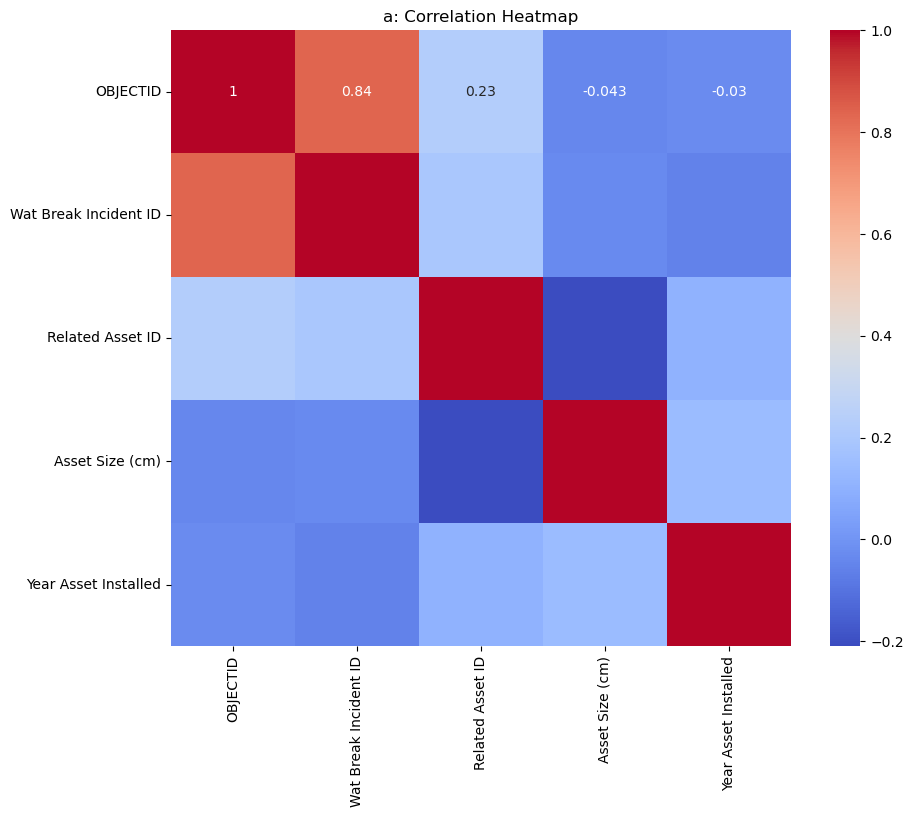

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title(" Correlation Heatmap")
plt.show()


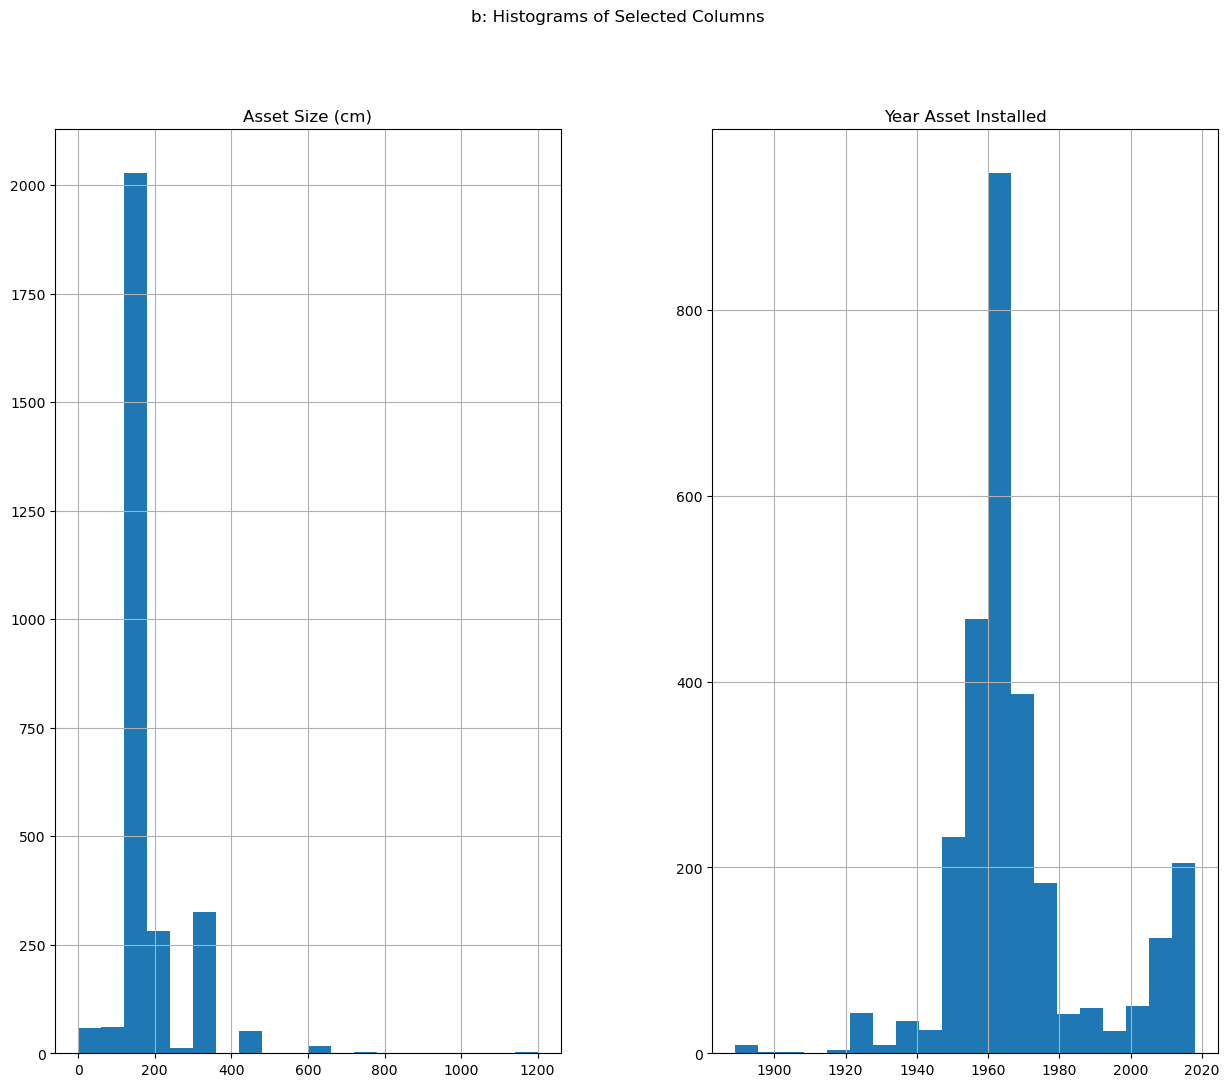

In [16]:
# Histograms
numeric_cols = ["Asset Size (cm)", "Year Asset Installed"]

df[numeric_cols].hist(figsize=(15, 12), bins=20)
plt.suptitle(" Histograms of Selected Columns")
plt.show()


In [ ]:
# Skewness & Kurtosis
for col in numeric_cols:
    print(f"{col}: Skewness={df[col].skew():.2f}, Kurtosis={df[col].kurt():.2f}")


In [ ]:

# Clean descriptive statistics table
desc_table = df.describe().T.round(2)
desc_table.style.set_caption("Descriptive Statistics").set_table_styles(
    [{'selector': 'caption',
      'props': [('color', 'black'), ('font-size', '16px'), ('font-weight', 'bold')]}]
)


In [ ]:

from scipy.stats import skew, kurtosis

num_cols = df.select_dtypes(include=[np.number]).columns
skewness = df[num_cols].skew().round(2)
kurt = df[num_cols].kurtosis().round(2)

sk_table = pd.DataFrame({"Skewness": skewness, "Kurtosis": kurt})
sk_table.style.set_caption("Skewness and Kurtosis").set_table_styles(
    [{'selector': 'caption',
      'props': [('color', 'black'), ('font-size', '16px'), ('font-weight', 'bold')]}]
)


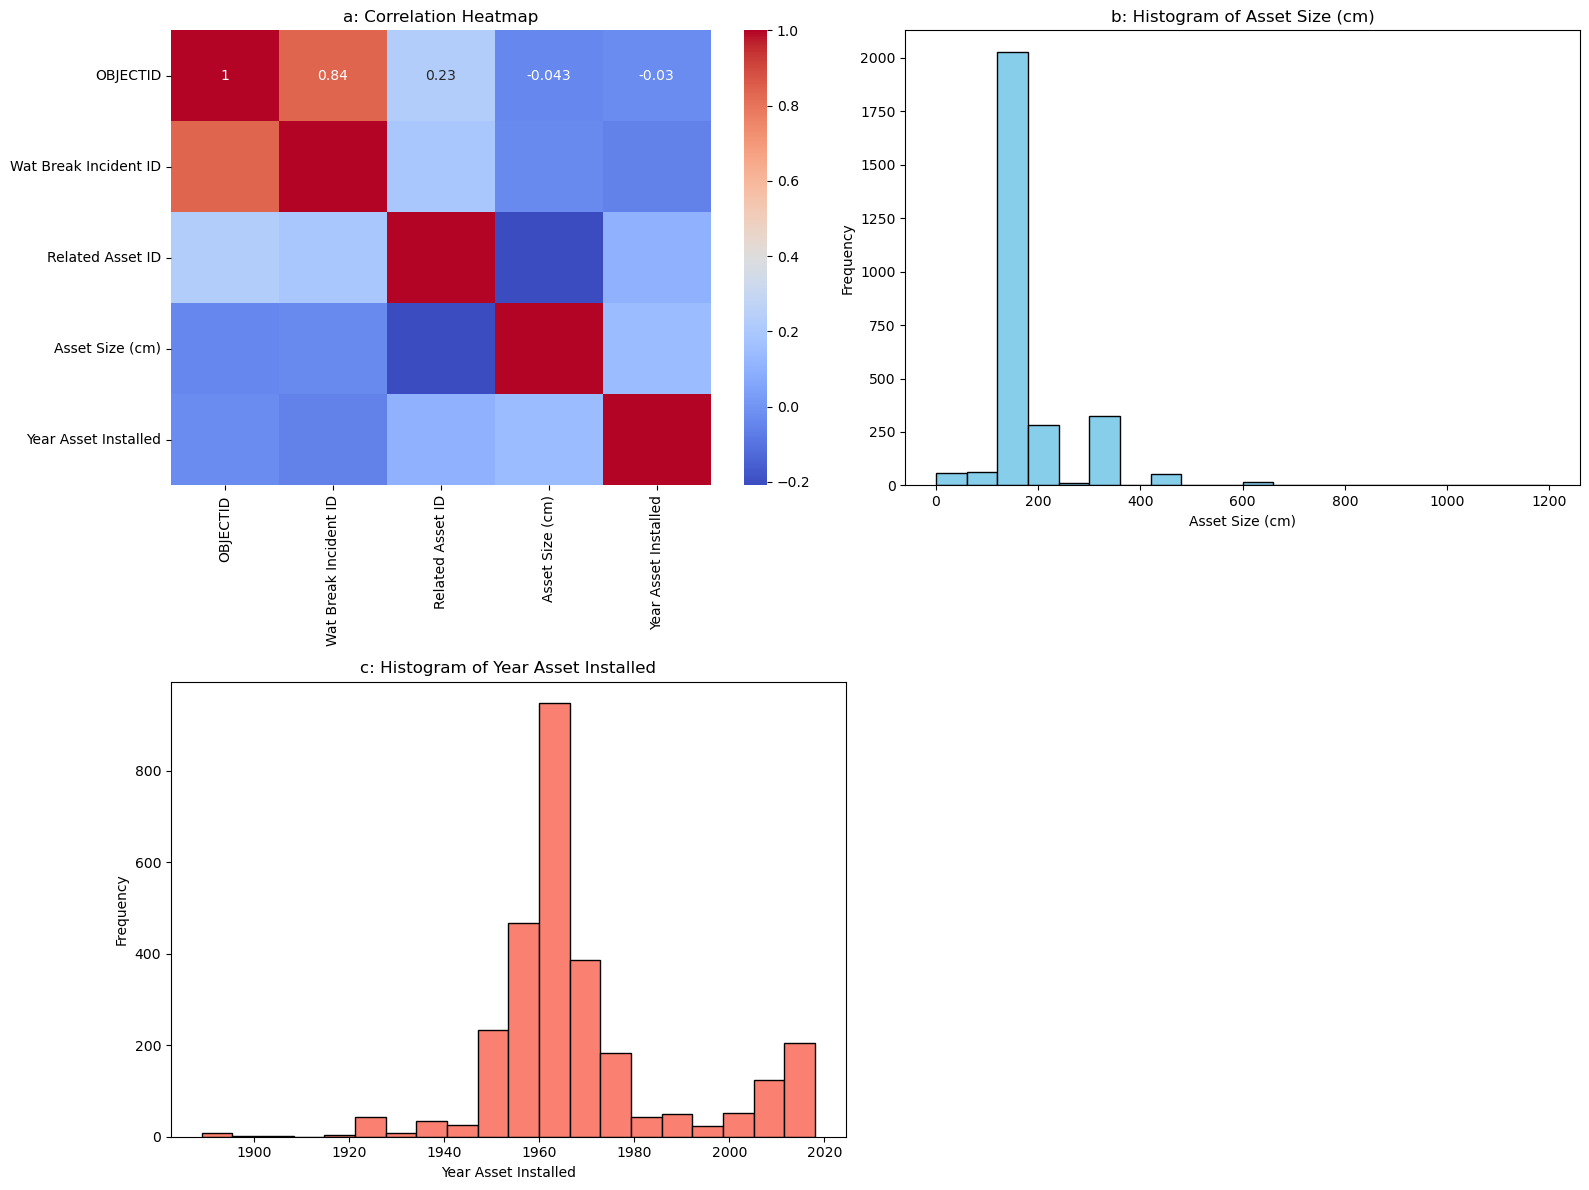

In [20]:
# Dashboard with Heatmap + Histograms (2x2 grid)
import matplotlib.pyplot as plt
import seaborn as sns

# Select the two numeric columns
numeric_cols = ["Asset Size (cm)", "Year Asset Installed"]

# Correlation matrix
correlation = df.corr(numeric_only=True)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Correlation Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[0,0])
axes[0,0].set_title("a: Correlation Heatmap")

# 2. Histogram - Asset Size (cm)
axes[0,1].hist(df["Asset Size (cm)"], bins=20, color='skyblue', edgecolor='black')
axes[0,1].set_title("b: Histogram of Asset Size (cm)")
axes[0,1].set_xlabel("Asset Size (cm)")
axes[0,1].set_ylabel("Frequency")

# 3. Histogram - Year Asset Installed
axes[1,0].hist(df["Year Asset Installed"], bins=20, color='salmon', edgecolor='black')
axes[1,0].set_title("c: Histogram of Year Asset Installed")
axes[1,0].set_xlabel("Year Asset Installed")
axes[1,0].set_ylabel("Frequency")

# 4. (Optional placeholder for another chart, e.g., boxplot)
axes[1,1].axis("off")  # Empty for now

plt.tight_layout()
plt.show()
